importing Jupyter notebook from Eigen Trappist1 initial conditions.ipynb


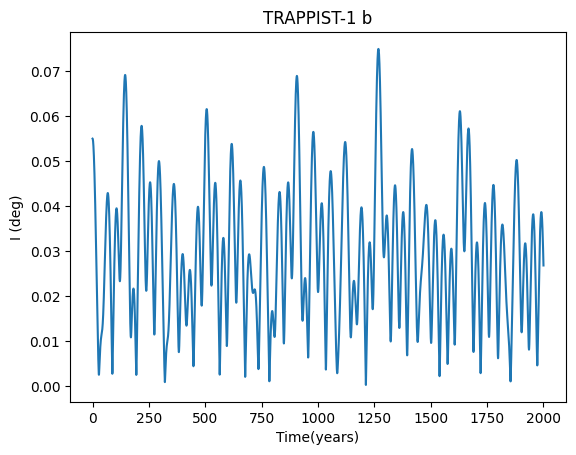

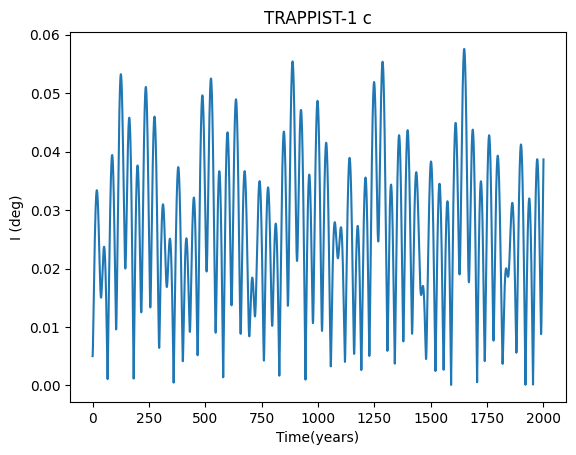

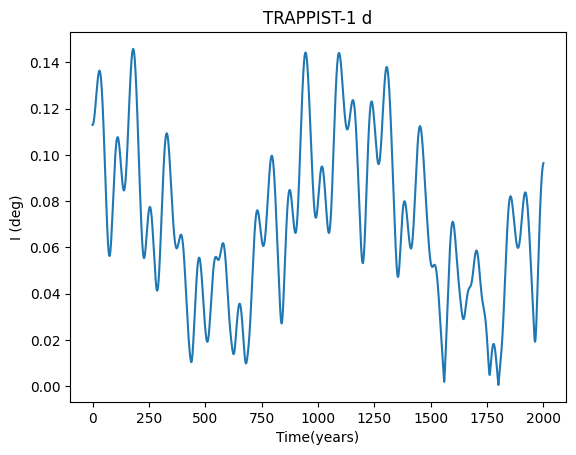

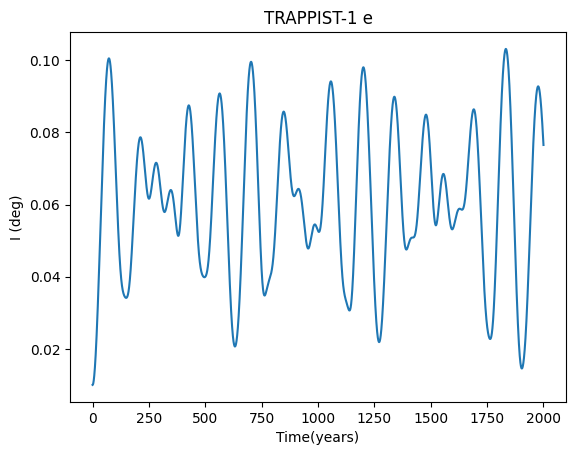

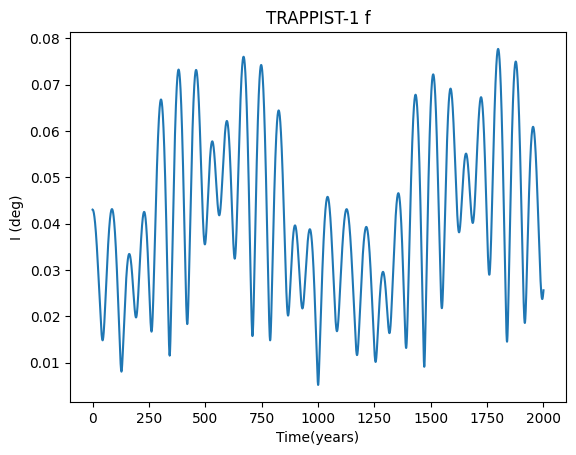

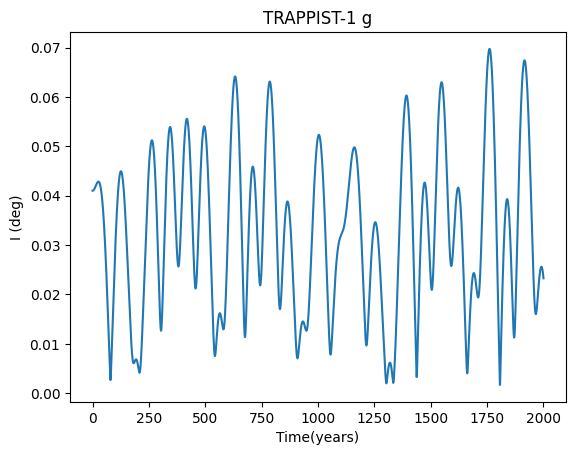

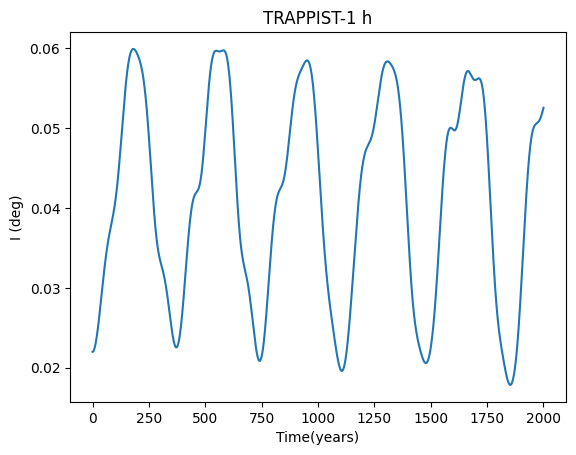

0.0030547340309755285 0.0030547340309755285
0.0005500909015790027 0.0005500909015790026
0.005632983223834418 0.005632983223834419
0.006324634376784164 0.006324634376784162
0.008415467901430081 0.008415467901430081
0.004009788024322483 0.0040097880243224835
0.003650054794109261 0.0036500547941092612


In [1]:
import pandas as pd
import numpy as np
from math import pi
from numpy import cos,sin
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from random import seed
import import_ipynb
from Eigen_Trappist1_initial_conditions import eigvals_B,gamma

In [2]:
gamma.shape

(7,)

In [3]:
pd.options.display.float_format = '{:.3f}'.format

## Table with data of Trappist-1 planets

In [4]:
data = {
    'Planet Name': ['TRAPPIST-1 b','TRAPPIST-1 c','TRAPPIST-1 d',
                    'TRAPPIST-1 e','TRAPPIST-1 f','TRAPPIST-1 g'
                    ,'TRAPPIST-1 h'] , 
     'Period(day)':  [1.510826,2.421937,4.049219,6.101013,9.207540,
                     12.352446,18.772866],
     'a (10^11 cm)' : [1.726,2.364,3.331,4.376,5.758,7.006, 9.529],
     'Radius (10^8 cm)' : [7.119,6.995,5.026,5.868,6.664,7.204,4.817] ,
     'Mass (10^27 g)' : [8.211,7.814,2.316,4.132,6.205,7.890,1.945],
    }
Table1 = pd.DataFrame(data=data)
Table1

,Planet Name,Period(day),a (10^11 cm),Radius (10^8 cm),Mass (10^27 g)
0,TRAPPIST-1 b,1.511,1.726,7.119,8.211
1,TRAPPIST-1 c,2.422,2.364,6.995,7.814
2,TRAPPIST-1 d,4.049,3.331,5.026,2.316
3,TRAPPIST-1 e,6.101,4.376,5.868,4.132
4,TRAPPIST-1 f,9.208,5.758,6.664,6.205
5,TRAPPIST-1 g,12.352,7.006,7.204,7.890
6,TRAPPIST-1 h,18.773,9.529,4.817,1.945


In [5]:
mass = Table1['Mass (10^27 g)'].to_numpy()
R = Table1['Radius (10^8 cm)'].to_numpy()

den = mass/((4/3)*pi*R**3)*1000
Table1['Mean density (g cm^-3)'] = den

In [6]:
Table1

,Planet Name,Period(day),a (10^11 cm),Radius (10^8 cm),Mass (10^27 g),Mean density (g cm^-3)
0,TRAPPIST-1 b,1.511,1.726,7.119,8.211,5.433
1,TRAPPIST-1 c,2.422,2.364,6.995,7.814,5.450
2,TRAPPIST-1 d,4.049,3.331,5.026,2.316,4.355
3,TRAPPIST-1 e,6.101,4.376,5.868,4.132,4.882
4,TRAPPIST-1 f,9.208,5.758,6.664,6.205,5.006
5,TRAPPIST-1 g,12.352,7.006,7.204,7.890,5.038
6,TRAPPIST-1 h,18.773,9.529,4.817,1.945,4.154


## Calculating mantle density and core radius

# Table with interior structures and moment of Inertia

In [7]:
data = {
    'Planet Name': ['TRAPPIST-1 b','TRAPPIST-1 c','TRAPPIST-1 d',
                    'TRAPPIST-1 e','TRAPPIST-1 f','TRAPPIST-1 g'
                    ,'TRAPPIST-1 h'] , 
     'Core density (g cm^-3)' : [12.0,12.0,10.0,12.0,12.0,12.0,10.0]
    }
Table2 = pd.DataFrame(data=data)
Table2

,Planet Name,Core density (g cm^-3)
0,TRAPPIST-1 b,12.000
1,TRAPPIST-1 c,12.000
2,TRAPPIST-1 d,10.000
3,TRAPPIST-1 e,12.000
4,TRAPPIST-1 f,12.000
5,TRAPPIST-1 g,12.000
6,TRAPPIST-1 h,10.000


In [8]:
cmf = 0.21
R = Table1['Radius (10^8 cm)']
mean_d = Table1['Mean density (g cm^-3)']
core_d = Table2['Core density (g cm^-3)']

Rf = R*(cmf*(mean_d/core_d))**(1/3) #10^8 cm
mantle_d = (mean_d - core_d*(Rf/R)**3)/(1-(Rf/R)**3) # gm cm^-3

Table2['Core Radius (10^8 cm)'] = Rf
Table2['Mantle density (g cm^-3)'] = mantle_d

In [9]:
Table2 #Which now matches to the Table 2 in the draft

,Planet Name,Core density (g cm^-3),Core Radius (10^8 cm),Mantle density (g cm^-3)
0,TRAPPIST-1 b,12.000,3.249,4.743
1,TRAPPIST-1 c,12.000,3.196,4.760
2,TRAPPIST-1 d,10.000,2.264,3.787
3,TRAPPIST-1 e,12.000,2.584,4.217
4,TRAPPIST-1 f,12.000,2.960,4.334
5,TRAPPIST-1 g,12.000,3.206,4.365
6,TRAPPIST-1 h,10.000,2.136,3.596


## Data(numpy array)

In [10]:
day_sec = 86400 #seconds
R = Table1['Radius (10^8 cm)']
R = R.to_numpy()
Rf = Table2['Core Radius (10^8 cm)']
Rf = Rf.to_numpy()
M = Table1['Mass (10^27 g)']
M = M.to_numpy()
rhom = Table2['Mantle density (g cm^-3)'] #g/cm^3
rhom = rhom.to_numpy()
rhof = Table2['Core density (g cm^-3)'] #g/cm^3
rhof = rhof.to_numpy()
period_in_seconds = Table1['Period(day)'] * day_sec
period_in_seconds = period_in_seconds.to_numpy()
rot = 2*pi/(period_in_seconds) #rad/sec

# Computing dynamical ellipticity

In [11]:
def rhs_clairaut(y,x,xcmb,rhof,rhom):
    if x < xcmb:
        dydx = np.array([ y[1] , -(6/x)*y[1]])
    else:
        zeta = rhom/(rhom + (rhof-rhom)*(xcmb/x)**3)
        dydx = np.array([ y[1], (-6/x)*zeta*y[1] - 
                         6/(x**2) * (zeta - 1) * y[0]])
    return dydx

In [12]:
def shoot_clairaut_homog(v,mm,rhom,rhof,xcmb):
    y0 = [float(v),0.0]
    xx = np.linspace(xcmb, 1, 201)
    yy = odeint(rhs_clairaut,y0,xx,args=(xcmb,rhof,rhom))
    
    nx = len(xx) - 1
    
    f = yy[nx,1] + 2*yy[nx,0] - (25/4)*mm
    return f,yy

In [13]:
def clairaut_homog(mm,rhom,rhof,xcmb):
    v0 = 0.001
    
    def func(x):
        f,yy = shoot_clairaut_homog(x,mm,rhom,rhof,xcmb)
        return f
    
    v = fsolve(func,v0)
    
    f,yy = shoot_clairaut_homog(v,mm,rhom,rhof,xcmb)
    
    ellf = v
    
    flat = yy[-1,0]
    ell = (rhof*xcmb**5*ellf + rhom*(flat-ellf*xcmb**5))/(rhof*xcmb**5 + 
                                                         rhom*(1-xcmb**5))
    return ellf,ell,flat

## Fluid core & whole planet ellipticities 

In [14]:
### Assuming rotation frequency = orbital frequency
G = 6.67430 * 10**-8 # cm^3 g^-1 s^-2
xcmb = Rf/R
mm = (rot**2 * R**3)/(G*M*(10**3))

ell = np.zeros((len(rot)))
ellf = np.zeros((len(rot)))
flat = np.zeros((len(rot)))

for i in range(len(rot)):
    ellf[i],ell[i],flat[i] = clairaut_homog(mm[i],rhom[i],rhof[i],xcmb[i])

In [15]:
data = {
    'Planet Name': ['TRAPPIST-1 b','TRAPPIST-1 c','TRAPPIST-1 d',
                    'TRAPPIST-1 e','TRAPPIST-1 f','TRAPPIST-1 g'
                    ,'TRAPPIST-1 h']
    }
Table3 = pd.DataFrame(data=data)
Table3[r'$ \epsilon (\times 10^{-4})$'] = flat * 10**4
Table3[r'$ \alpha (\times 10^{-4})$'] = ell * 10**4
Table3[r'$ \alpha_{c} (\times 10^{-4})$'] = ellf * 10**4

In [16]:
Table3

,Planet Name,$ \epsilon (\times 10^{-4})$,$ \alpha (\times 10^{-4})$,$ \alpha_{c} (\times 10^{-4})$
0,TRAPPIST-1 b,40.999,40.641,28.809
1,TRAPPIST-1 c,15.911,15.772,11.200
2,TRAPPIST-1 d,7.085,7.020,4.866
3,TRAPPIST-1 e,2.761,2.733,1.820
4,TRAPPIST-1 f,1.186,1.174,0.794
5,TRAPPIST-1 g,0.655,0.649,0.440
6,TRAPPIST-1 h,0.344,0.340,0.229


## Expression for M.O.I. 

$$
    A_{f} = \frac{8 \pi}{3} \int^{r_{f}}_{0} \rho_{f} [ r^{4} - \frac{1}{15} \frac{\partial}{\partial r} (r^{5}f(r)) ] dr
    \\
          = \frac{8 \pi}{3} \bigg[ \rho_{f} \int^{r_{f}}_{0} r^{4} dr - \frac{\rho_{f}}{15} \int^{r_{f}}_{0} \partial (r^{5}f(r)) \bigg]
          \\
          \boxed{A_{f} = \frac{8 \pi}{15} \rho_{f} r_{f}^{5}}
$$

Similarly, expression for the mean moment of inertia, A:
$$
    A = A_{f} + \frac{8 \pi}{3} \int_{r_{f}}^{R} \rho_{m} [ r^{4} - \frac{1}{15} \frac{\partial}{\partial r} (r^{5}f(r)) ] dr \\
    \boxed{A = A_{f} + \frac{8 \pi}{15} (\rho_{m}[R^{5} - r_{f}^{5}])} \\
    \boxed{A_{m} = A - A_{f}}
$$

## Calculating M.O.I.

In [17]:
Af = (8*pi/15)*rhof*(Rf**5) #10^40 g cm^2
A = Af + (8*pi/15)*rhom*(R**5 - Rf**5) #10^40 g cm^2
Am = A - Af #10^40 g cm^2

# Updated Table 2

In [18]:
Table2[r'$ I (10^{37} \text{kg} \ \text{m}^{2})$'] = A * 10**-4
Table2[r'$ I_{m} (10^{37} \text{kg} \ \text{m}^{2})$'] = Am * 10**-4
Table2[r'$ I_{c} (10^{37} \text{kg} \ \text{m}^{2})$'] = Af * 10**-4

In [19]:
Table2

,Planet Name,Core density (g cm^-3),Core Radius (10^8 cm),Mantle density (g cm^-3),$ I (10^{37} \text{kg} \ \text{m}^{2})$,$ I_{m} (10^{37} \text{kg} \ \text{m}^{2})$,$ I_{c} (10^{37} \text{kg} \ \text{m}^{2})$
0,TRAPPIST-1 b,12.000,3.249,4.743,14.972,14.244,0.728
1,TRAPPIST-1 c,12.000,3.196,4.760,13.760,13.090,0.670
2,TRAPPIST-1 d,10.000,2.264,3.787,2.097,1.997,0.100
3,TRAPPIST-1 e,12.000,2.584,4.217,5.066,4.835,0.232
4,TRAPPIST-1 f,12.000,2.960,4.334,9.835,9.379,0.457
5,TRAPPIST-1 g,12.000,3.206,4.365,14.624,13.943,0.681
6,TRAPPIST-1 h,10.000,2.136,3.596,1.610,1.536,0.075


# Computing Obliquities

### Glossary

1) $\epsilon_{m}$: Obliquity of the mantle
2) $\theta_{m}$: Small offset of the rotation vector with respect to the mantle orientation
3) $\theta_{f}$: Offset of the spin of the fluid core with respect to the mantle spin vector
4) $\theta_{m} + \theta_{f}$: Angle of offset between the spin axis of the fluid core and the mantle symmetry axis.

# NOTE: The solutions here assume I = 0.1 degree

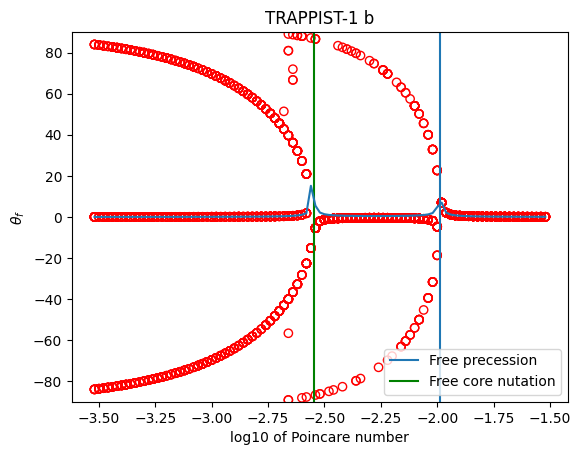

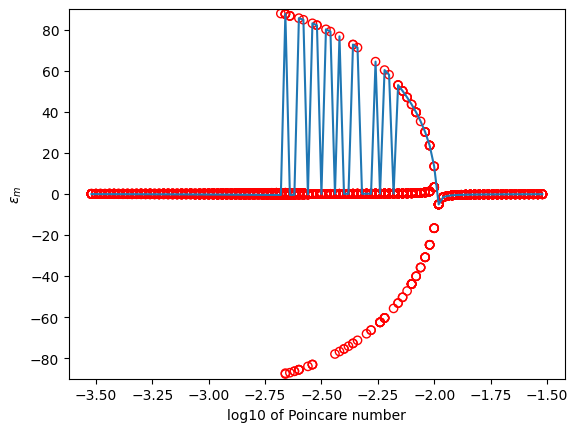

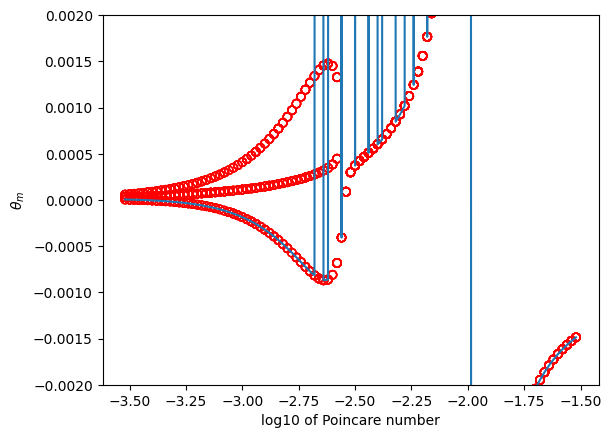

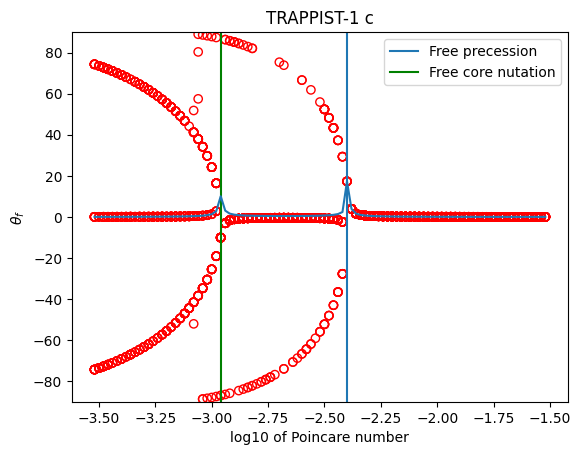

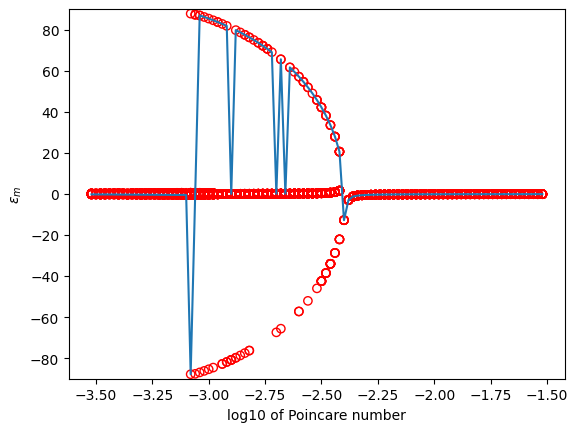

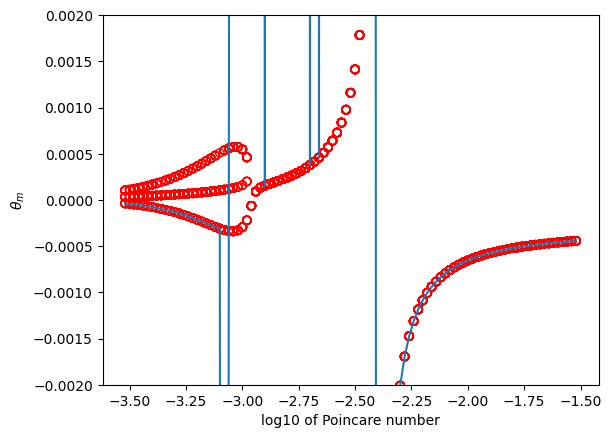

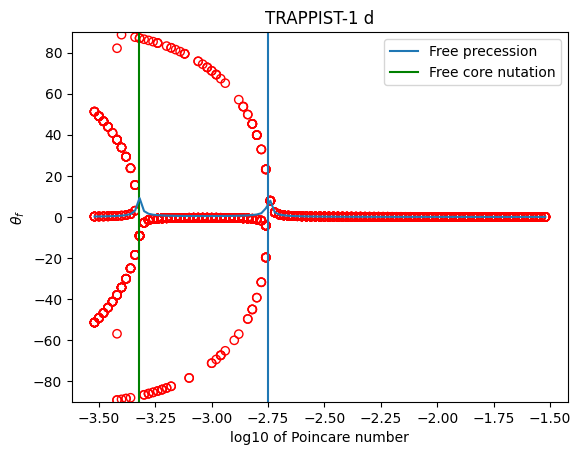

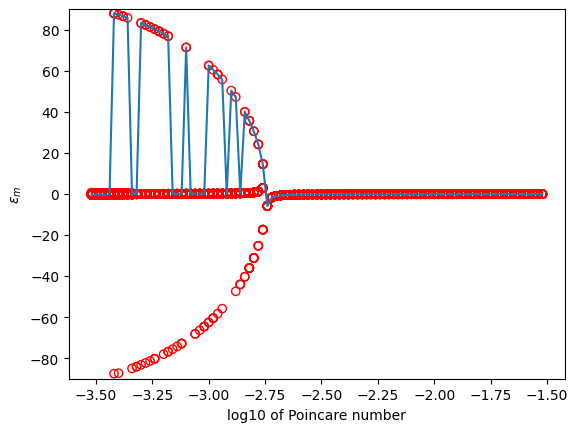

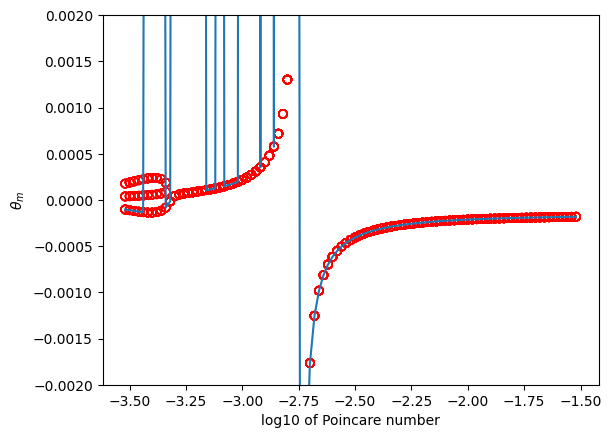

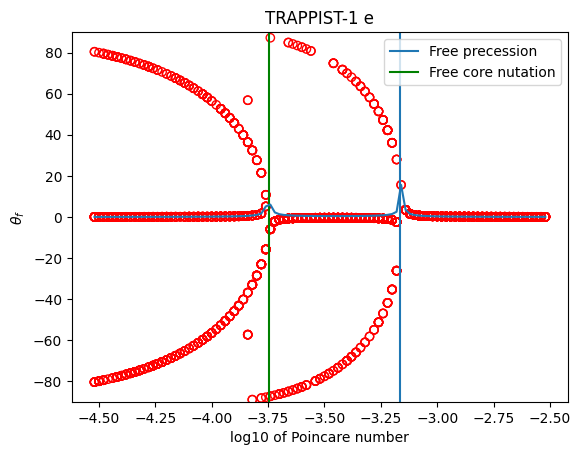

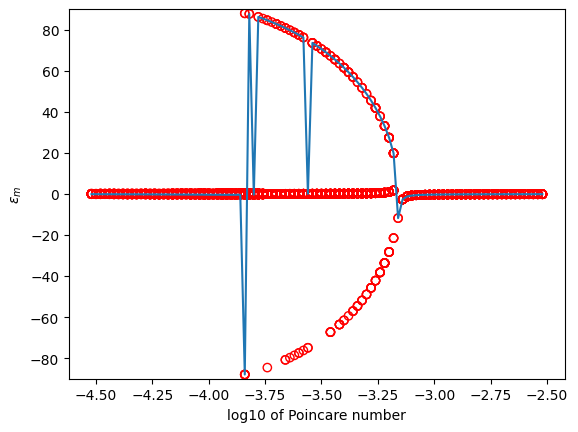

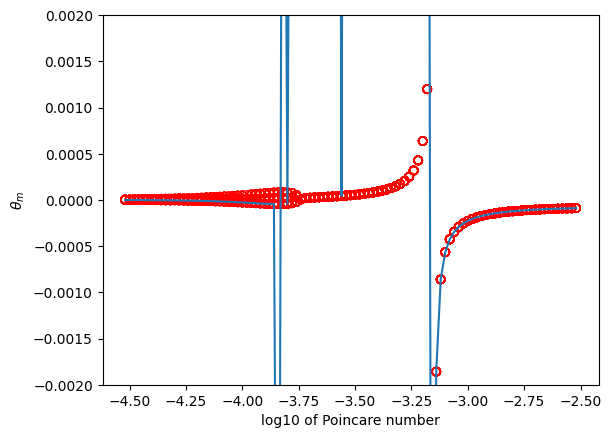

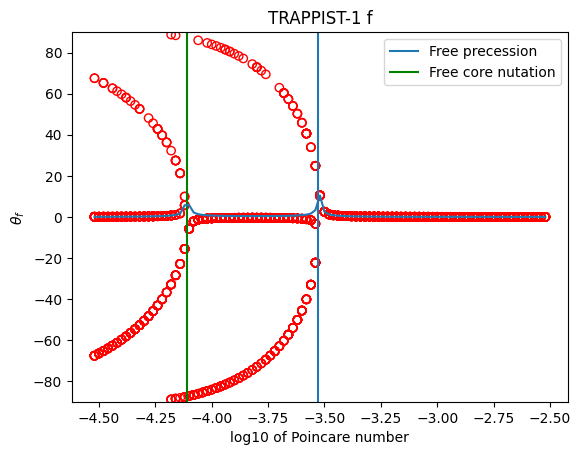

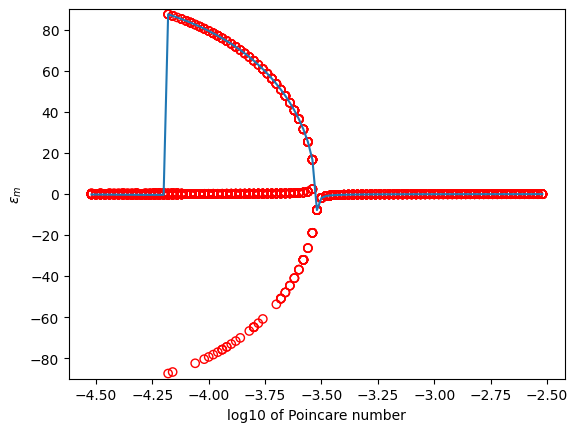

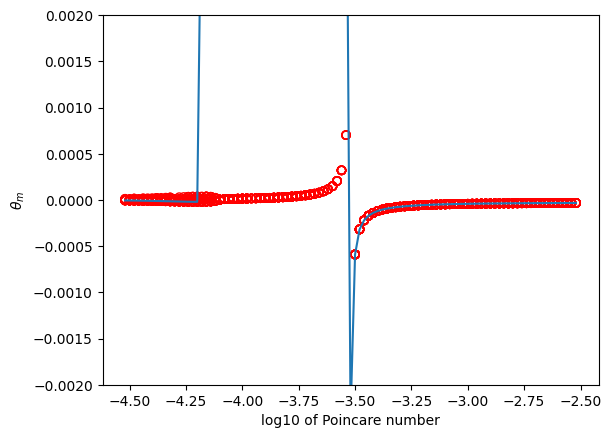

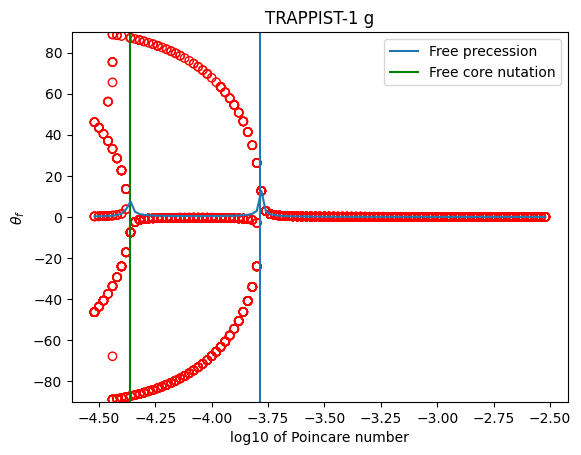

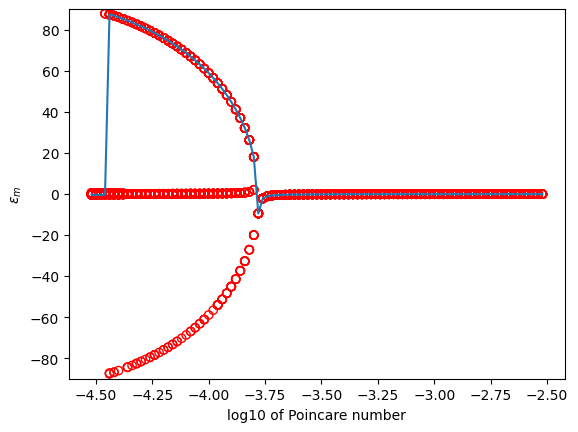

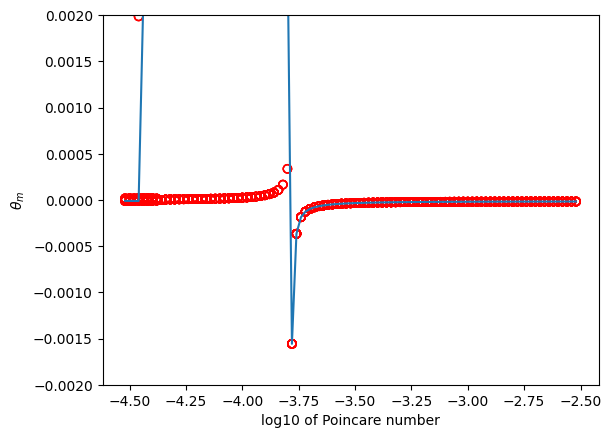

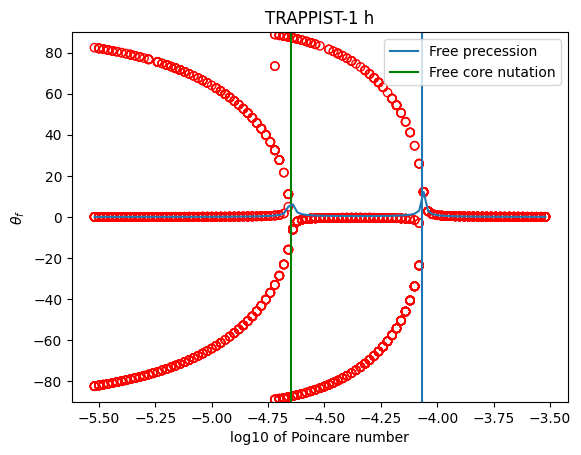

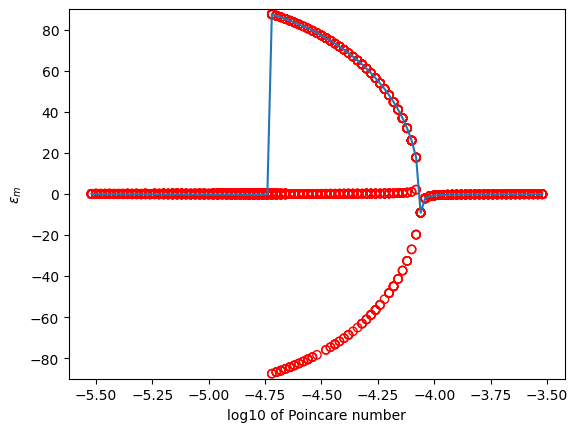

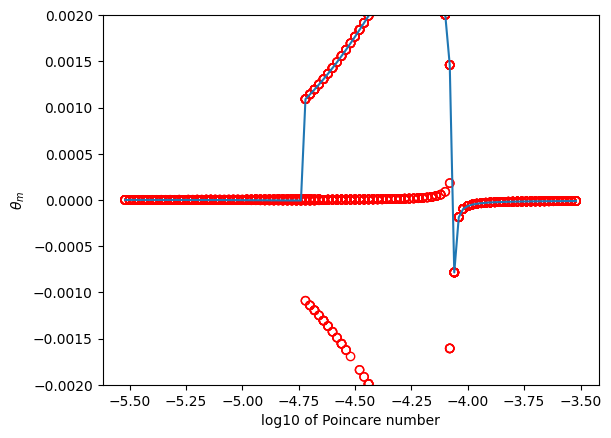

In [20]:
def non_linear_system(var,*data):
    A = data[0][0]
    Af = data[0][1]
    ell = data[0][2]
    ellf = data[0][3]
    I = data[0][4]
    dsigma = data[0][5]
    
    theta_m = var[0]
    theta_f = var[1]
    ep_m = var[2]
    
    s = - 1.0 - cos(I + ep_m)*dsigma
    
    sIem = sin(I + ep_m)
    cIem = cos(I + ep_m)
    x12 = theta_m + theta_f
    s12 = sin(x12) - sin(theta_m)
    c12 = cos(x12) - cos(theta_m)
    
    F = np.empty(3)
    
    Flin = (s - ell*cos(theta_m))*sin(theta_m) + (Af/A)*(s*s12 + sin(theta_f) - ellf*sin(theta_m)*c12)
    
    F[0] = Flin + 1.5*ell*sin(ep_m)*(13/10*cos(ep_m) + 0.3)
    F[1] = (sin(theta_f) + s*sin(x12) + ellf*cos(x12)*s12)
    F[2] = s*sin(I+ep_m) + sin(theta_m + I + ep_m)
    
    return F

seed(1)
npts = 101
nicond = 51

I  = 0.1*(pi/180) #rad

scale = pi/180
kappa = 4*10**-4

theta_m = np.zeros((npts,nicond))
theta_f = np.zeros((npts,nicond))
ep_m = np.zeros((npts,nicond))
power = np.zeros((npts,1))

number_of_planets = 7

theta_m0 = np.zeros([number_of_planets,npts])
theta_f0 = np.zeros([number_of_planets,npts])
ep_m0 = np.zeros([number_of_planets,npts])

for j in range(number_of_planets):

    A1 = A[j] #10^40 g cm^2
    Af1 = Af[j] #10^40 g cm^2
    Am1 = Am[j] #10^40 g cm^2
    ell1 = ell[j] #unitless
    ellf1 = ellf[j] #unitless
    rot1 = rot[j] #rad/sec
    
    l_fp = (A1/Am1)*ell1*(3/2)*(16/10)

    #w_fp = rot1*l_fp #rad/sec
    #w_fcn = rot1*(A1/Am1)*(ellf1 + l_fp)*(1/2 - (1/2)*(1-4*(Am1/A1)*(
    #(ellf1*l_fp)/((ellf1 + l_fp)**2)))**(1/2)) #rad/sec

    w_fp = l_fp #rad
    w_fcn = (A1/Am1)*(ellf1 + l_fp)*(1/2 - (1/2)*(1-4*(Am1/A1)*(
    (ellf1*l_fp)/((ellf1 + l_fp)**2)))**(1/2)) #rad
    #print(round(np.log10(w_fcn),0))
    for k in range(npts):

        power[k] = ((round(np.log10(w_fcn),0) - 0.50) + 2*(k-1)/(npts-1))
        dsigma = 10**power[k]

        xmin = - 90*scale
        xmax = 90*scale
        x0 = np.zeros((3,1))
        sol = np.zeros((3))

        for i in range(nicond):

            x0[0,0] = 10**-4 #rad
            x0[1,0] = (xmin + (xmax-xmin)*np.random.random(1)) #rad
            x0[2,0] = (xmin + (xmax-xmin)*np.random.random(1)) #rad

            data = np.array([A1,Af1,ell1,ellf1,I,dsigma[0]])
            sol,info,ier,msg = fsolve(non_linear_system,x0,args=data,full_output=True,maxfev=50,xtol=10**-12)

            if (ier != 1):
                sol[:] = 10**3

            if (sol[1] < xmin) or (sol[1] > xmax):
                sol[:] = 10**3

            if (sol[2] < -88.0*scale) or (sol[2] > 88.0*scale):
                sol[:] = 10**3

            theta_m[k,i] = sol[0]/scale #deg
            theta_f[k,i] = sol[1]/scale #deg
            ep_m[k,i] = sol[2]/scale #deg

        min_theta_f = min(abs(theta_f[k,:]))
        min_index = np.argmin(theta_f[k,:])
        theta_f0[j,k] = min_theta_f
        theta_m0[j,k] = theta_m[k,min_index]
        ep_m0[j,k] = ep_m[k,min_index]

    plt.axvline(x = np.log10(w_fp),label = 'Free precession')
    plt.axvline(x = np.log10(w_fcn),label = 'Free core nutation',color='g')
    plt.title(Table1['Planet Name'][j])
    plt.plot(power,theta_f0[j,:])
    plt.xlabel('log10 of Poincare number')
    plt.ylabel(r'$\theta_{f}$')
    for i in range(nicond):
        plt.scatter(power,theta_f[:,i],facecolors='none',edgecolors='r')
    plt.ylim(-90,90)
    plt.legend()
    plt.show()

    plt.plot(power,ep_m0[j,:])
    plt.xlabel('log10 of Poincare number')
    plt.ylabel(r'$\epsilon_{m}$')
    for i in range(nicond):
        plt.scatter(power,ep_m[:,i],facecolors='none',edgecolors='r')
    plt.ylim(-90,90)
    plt.show()

    plt.plot(power,theta_m0[j,:])
    plt.xlabel('log10 of Poincare number')
    plt.ylabel(r'$\theta_{m}$')
    for i in range(nicond):
        plt.scatter(power,theta_m[:,i],facecolors='none',edgecolors='r')
    plt.ylim(-2*10**-3,2*10**-3)
    plt.show()

In [21]:
#theta_f0 and ep_m0 are is degrees whereas, scaled eigenvectors are
#in radians

iterations = 10**5
timeline = np.linspace(0,2000,iterations)

p_f_time = np.zeros([number_of_planets,iterations])
q_f_time = np.zeros([number_of_planets,iterations])

p_m_time = np.zeros([number_of_planets,iterations])
q_m_time = np.zeros([number_of_planets,iterations])

p_time = np.zeros([number_of_planets,iterations])
q_time = np.zeros([number_of_planets,iterations])

for i in range(iterations):
    p_time[:,i] = np.matmul(eigvecs_B,T*np.sin(eigvals_B*timeline[i]*(pi/180) ))
    q_time[:,i] = np.matmul(eigvecs_B,T*np.cos(eigvals_B*timeline[i]*(pi/180) ))

for i in range(iterations):
    p_f_time[:,i] = np.matmul(theta_f0,np.sin(eigvals_B*timeline[i]*(pi/180) ))
    q_f_time[:,i] = np.matmul(theta_f0,np.cos(eigvals_B*timeline[i]*(pi/180) ))

for i in range(iterations):
    p_m_time[:,i] = np.matmul(ep_m0,np.sin(eigvals_B*timeline[i]*(pi/180) ))
    q_m_time[:,i] = np.matmul(ep_m0,np.cos(eigvals_B*timeline[i]*(pi/180) ))

theta_f_time = np.sqrt(p_f_time**2 + q_f_time**2) #deg
ep_m_time = np.sqrt(p_m_time**2 + q_m_time**2) #deg
I_time = np.sqrt(p_time**2 + q_time**2) #rad

for i in range(len(I_time)):
    plt.plot(timeline,theta_f_time[i],label=r'$\theta_{f}$')
    plt.plot(timeline,ep_m_time[i],label=r'$\epsilon_{m}$')
    plt.plot(timeline,I_time[i]*(180/pi),label=r'$I$')
    plt.xlabel('Time(years)')
    plt.ylabel('Amplitude(deg)')
    plt.title(Table1['Planet Name'][i])
    plt.legend()
    #plt.savefig(f"../New results/inclination,mantle_obl,core_offset/{Table1['Planet Name'][i]}.png")
    plt.show()
    

NameError: name 'eigvecs_B' is not defined